# Solar Radiation and the Ever Changing 
 
@author = Gavin Drake  
@date = 2023-03-30  
@license = MIT -- https://opensource.org/licenses/MIT

# Introduction: 

This project will lookat solar radiation, precipitation, temperature, and other atmospheric data which can be used to  monitor seasonality changes in North Orono, Maine. Monitoring variables in the environment is vital to discover reasons for varibility between the seasons over time. As climate change is an ever pressing matter, knowing what is causing increased varibility is important to distinguish a root cause of this to create policy that will be most effective. During this research CO2 was found to not be showing seasonality and remained constant. However, there are multiple locational traits that may be responsible for this occurrence.

To find these results, there are multiple python techniques that were applied in order to load and manage the Ameriflux Data. There were multiple sections of data that were missing so to use the data that was downloaded and be used for future data, a 'def' statement was written. This allows for a quicker and easier way for a user of the code to run a ameriflux data. 

# Question/Hypothesis: 

My first question was "What environmental variables contribute to increased variability in seasonality over time?" but, then transformed into "Why does the atmospheric CO2 in this location not show seasonality?"

# Site:
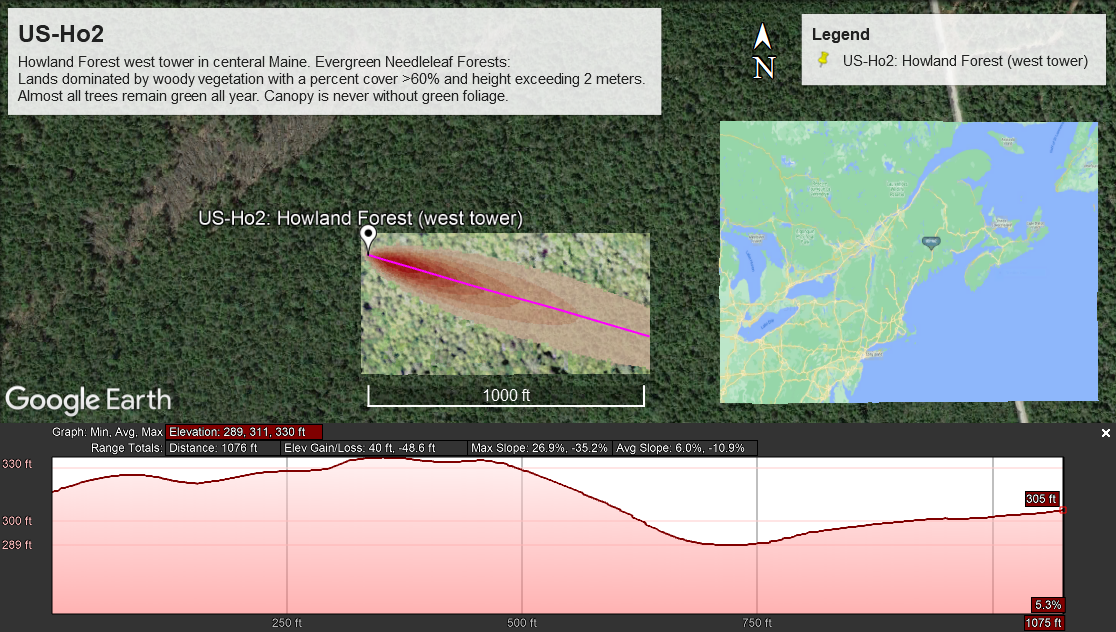

30 miles North of Orono, Maine (US-Ho2)
    Elevation: 60m
    Location: Howland Forest, Evergreen Needleleaf Forests
    Climate: Warm Summer Continental 

# Data: 
From AmeriFlux Date: 1999-2020 Name: Daily Project Data.csv Location: C:\Users\Gavin\OneDrive\Documents\HDA lecture\Project

In [1]:
# Importing modules

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np



In [2]:
#Specifying parameters: Such as date, in file names, etc

infile_name = 'Daily Project Data.csv'

fig_title = 'North Orono, ME'



In [3]:
#Loading Data: using the methods from Lab 6 to load data
    
#loading data and removing -9999 values
def readscan(filename):
   data = pd.read_csv(infile_name, comment = '#', parse_dates = ['TIMESTAMP'],
                      index_col = ['TIMESTAMP'], na_values = ('-9999'))
   data = data.resample('D').mean()
   data = data.rename(columns={'P_F': 'Precip', 'TA_F': 'Air_Temp', 'WS_F': 'WS', 
                               'CO2_F_MDS': 'CO2'})
   data.replace([np.nan], 0, inplace = True)
   return data

data = readscan(infile_name)



In [4]:
#For Loop

# Making for loop to add columns to 'data'
columns= ['H', 'LE', 'SW_IN', 'SW_OUT', 'LW_IN', 'LW_OUT', 'TS', 
          'Precip', 'NETRAD', 'Air_Temp', 'WS', 'CO2']
for c in columns:
     if c in data.columns.tolist():
         pass
     else:
         data[c]=data.filter(like=c+'_', axis=1).mean(axis=1)
data = data[columns]



In [5]:
#Calculations

# Rolling Command
data['7_day_AT'] = data['Air_Temp'].rolling(7, center = False).mean()

data['7_day_Rad'] = data['NETRAD'].rolling(7, center = False).mean()

# creating a start and end date for the water year
startdate=data.loc[(data.index.month==10)&(data.index.day==1)].index[0]

enddate=data.loc[(data.index.month==9)&(data.index.day==30)].index[-1]

data=data[startdate:enddate]



creates a new column in the data file that looks averages the data from a 7 day period into one variable throughout a water year. This then continues for every water year in the data.

Text(0.5, 1.0, 'North Orono, ME')

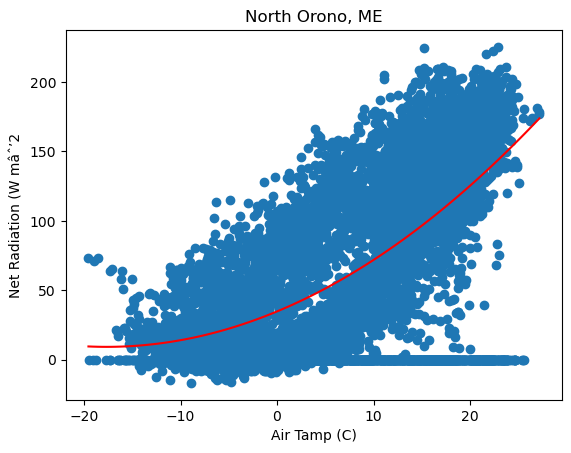

In [6]:
#Plot 1 


# Plot scatter plot
fig, ax = plt.subplots()
ax.scatter(data['7_day_AT'],data['7_day_Rad'])
x=data['7_day_AT']
y=data['7_day_Rad']
coefficients = np.polyfit(x, y, 2)

# Plotting the best-fit line
x_fit = np.linspace(min(x), max(x), num=100)
y_fit = coefficients[0]*(x_fit)**2+ coefficients[1] * x_fit + coefficients[2]
plt.plot(x_fit, y_fit, color='red')

# Add x-axis label
ax.set_xlabel('Air Tamp (C)')

# Add y-axis label
ax.set_ylabel('Net Radiation (W mâˆ’2')

# Add plot title
ax.set_title(fig_title)



Text(0.5, 1.0, 'North Orono, ME')

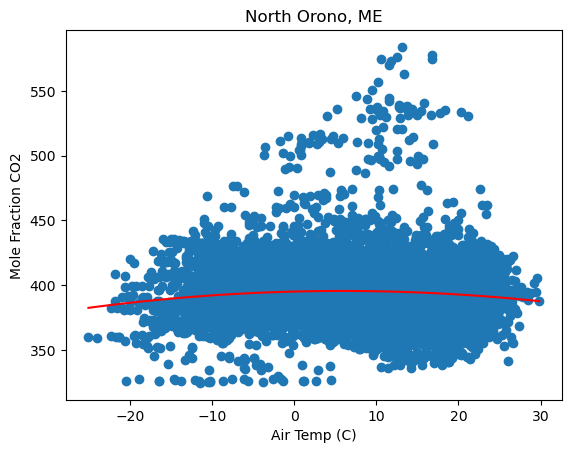

In [7]:
#%% plot 2

# Plot scatter plot
fig, ax = plt.subplots()
ax.scatter(data['Air_Temp'],data['CO2'])
x=data['Air_Temp']
y=data['CO2']
coefficients = np.polyfit(x, y, 2)

# Plotting the best-fit line
x_fit = np.linspace(min(x), max(x), num=100)
y_fit = coefficients[0]*(x_fit)**2+ coefficients[1] * x_fit + coefficients[2]
plt.plot(x_fit, y_fit, color='red')

# Add x-axis label
ax.set_xlabel('Air Temp (C)')

# Add y-axis label
ax.set_ylabel('Mole Fraction CO2')

# Add plot title
ax.set_title(fig_title)



In [8]:
#%% Monthly CO2 calc

# Add columns (month, water_year,day_of_year)
data['month']=data.index.month
data['water_year']=data.index.year
data.loc[data['month']>9,'water_year']= data.loc[data['month']>9,'water_year'] +1
data['day_of_year']=data.index.dayofyear

# Annual data series
data_annual = data.groupby('water_year')['CO2'].sum()

# Calculations
c = np.mean(data_annual) #avg annual total CO2

# Average monthly calc
c_month = c/12

# New dataframe for monthly data
data_monthly = data.groupby('month')[['day_of_year']].median()

# Creating new CO2 column in new dataframe
data_monthly['CO2'] = np.NAN

for i in range(1,13):
    cmonth = data.loc[data['month']==i,['CO2', 'water_year']]
    monthmean = cmonth.groupby('water_year').sum().mean()
    data_monthly.loc[i,'CO2'] = monthmean[0]
    
    

Calculates the monthly average of CO2 for every water year and also the yearly average to show the contrasting amounts between each month.

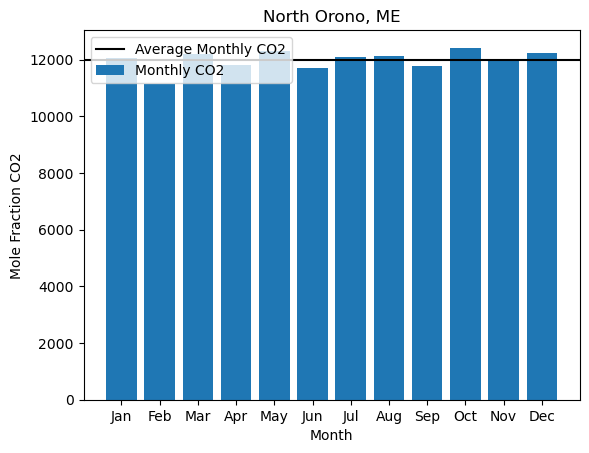

In [9]:
#%% CO2 Bar Chart

fig, ax = plt.subplots()

# Plot monthly precipitation
ax.bar(data_monthly.index, data_monthly['CO2'], label='Monthly CO2')

# Plot average monthly precipitation
ax.axhline(c_month, ls='-', color='k', label='Average Monthly CO2')

# Add x-axis label
ax.set_xlabel('Month')

# Add y-axis label
ax.set_ylabel('Mole Fraction CO2')

# Add plot title
ax.set_title(fig_title)

# Add legend
ax.legend()

# Setting tick locations
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])

# Change x-axis tick labels to month names
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()



In [10]:
#%% Monthly precip calc

# Add columns (month, water_year,day_of_year)
data['month']=data.index.month
data['water_year']=data.index.year
data.loc[data['month']>9,'water_year']= data.loc[data['month']>9,'water_year'] +1
data['day_of_year']=data.index.dayofyear

# Annual data series
data_annual = data.groupby('water_year')['Precip'].sum()

# Calculations
P = np.mean(data_annual) #avg annual total Precip

# Average monthly calc
P_month = P/12

# New dataframe for monthly data
data_monthly = data.groupby('month')[['day_of_year']].median()

# Creating new CO2 column in new dataframe
data_monthly['CO2'] = np.NAN

for i in range(1,13):
    pmonth = data.loc[data['month']==i,['Precip', 'water_year']]
    monthmean = pmonth.groupby('water_year').sum().mean()
    data_monthly.loc[i,'Precip'] = monthmean[0]
    
    

Calculates the monthly average of CO2 for every water year and also the yearly average to show the contrasting amounts between each month. SHows a faily constant amount of CO2 per month with not many months dropping below the yearly average.

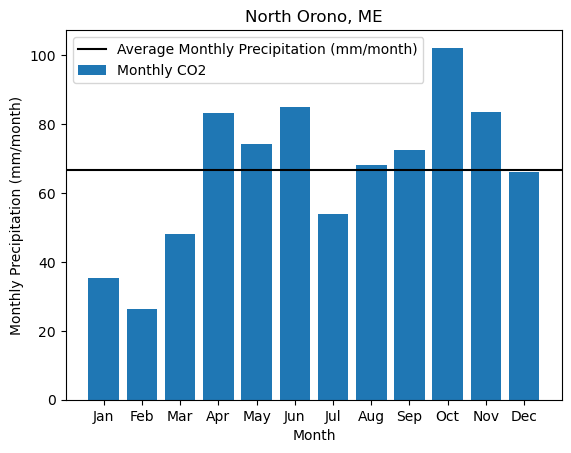

In [11]:
#%% Precip Bar Chart

fig, ax = plt.subplots()

# Plot monthly precipitation
ax.bar(data_monthly.index, data_monthly['Precip'], label='Monthly CO2')

# Plot average monthly precipitation
ax.axhline(P_month, ls='-', color='k', label='Average Monthly Precipitation (mm/month)')

# Add x-axis label
ax.set_xlabel('Month')

# Add y-axis label
ax.set_ylabel('Monthly Precipitation (mm/month)')

# Add plot title
ax.set_title(fig_title)

# Add legend
ax.legend()

# Setting tick locations
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])

# Change x-axis tick labels to month names
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()



SImilarly to the CO2 plot, this Bar chart plots the average precipitation amounts from every month in a water year for all the water years in the data. There is a stark difference in the amount of precipitation in the winter and the fall months of the year. 

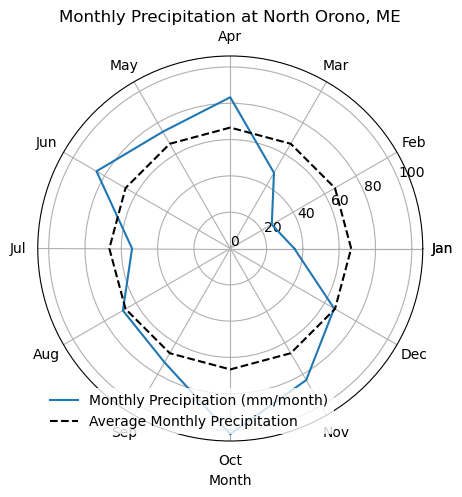

In [12]:
#Create Polar Plot

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='polar')

# Plot monthly precipitation
theta = np.linspace(0, 2*np.pi, 13)
r = data_monthly['Precip'].tolist()
r.append(r[0])
ax.plot(theta, r)

# Add circular line for average monthly precipitation
avg_precip = np.ones(13) * data_monthly['Precip'].mean()
ax.plot(theta, avg_precip, color='k', linestyle='--')

# Set x-axis (theta) labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']
ax.set_xticks(theta)
ax.set_xticklabels(month_names)

# Set radial axis (r) ticks
ax.set_yticks(np.arange(0, 110, 20))

# Add labels, legend, and title
ax.set_xlabel('Month')
ax.set_title('Monthly Precipitation at North Orono, ME')
legend = ax.legend(['Monthly Precipitation (mm/month)', 
                    'Average Monthly Precipitation'], loc='lower left')
legend.get_frame().set_linewidth(0)

# Display plot
plt.show()



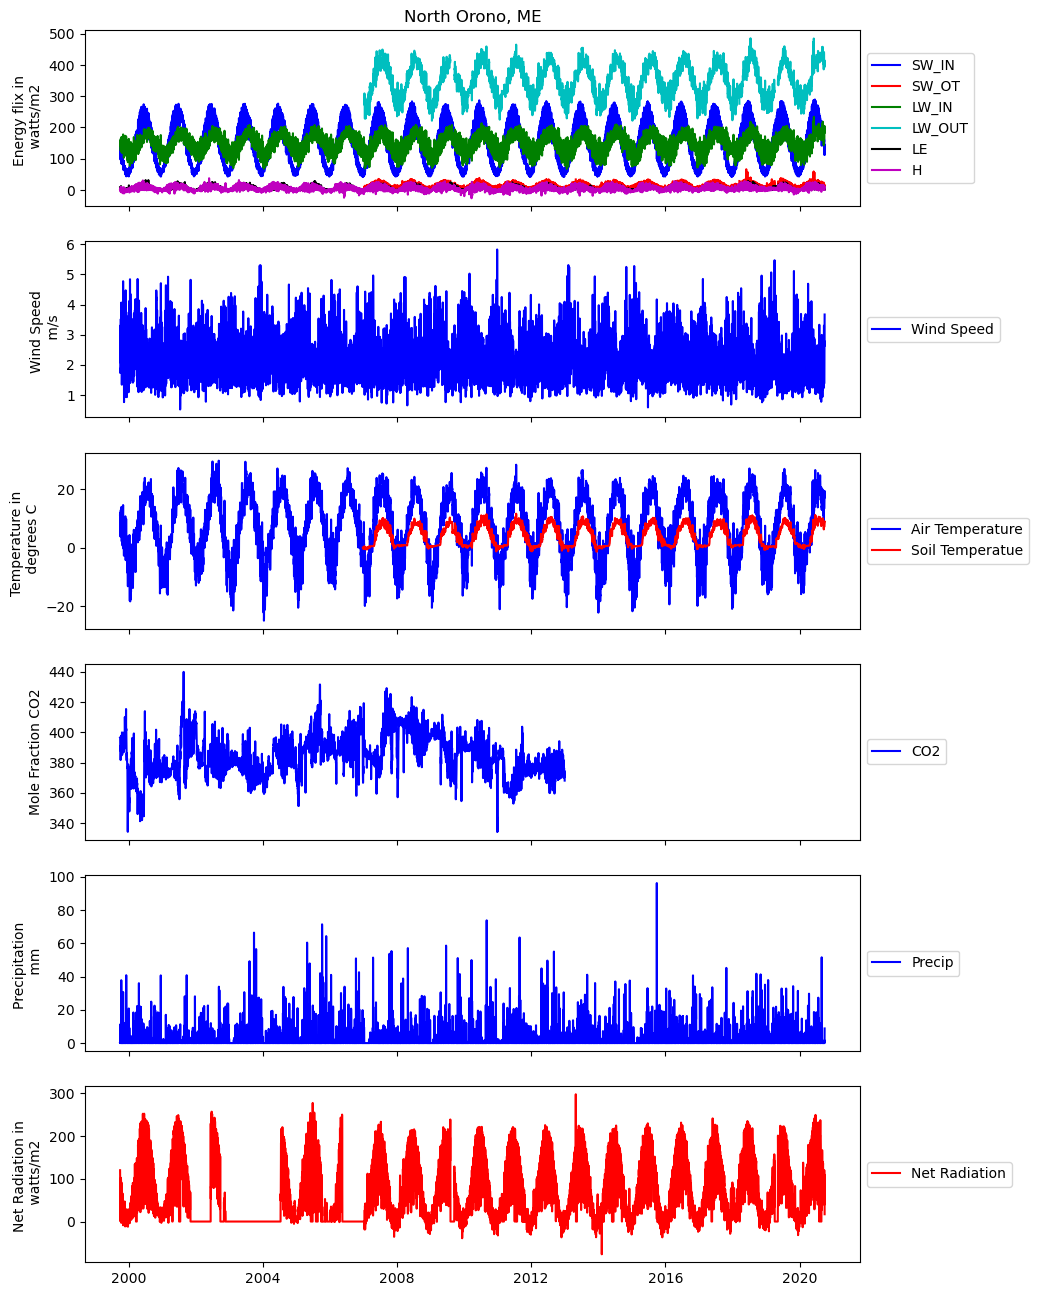

In [13]:
#%% Plotting Time Series

# Replace LW_OUT values below 100 with NaN
data.loc[data['LW_OUT']<100, 'LW_OUT'] = np.nan

# Replace 0 values with NaN
data.loc[data['SW_IN'] == 0, 'SW_IN'] = np.nan

# Replace 0 values with NaN
data.loc[data['SW_OUT'] == 0, 'SW_OUT'] = np.nan

# Replace 0 values with NaN
data.loc[data['TS'] == 0, 'TS'] = np.nan

# Creating plots
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1, 
figsize = (10,16), sharex = True)

ax1.plot(data['SW_IN'], 'b-', label = 'SW_IN')
ax1.plot(data['SW_OUT'], 'r-', label = 'SW_OT')
ax1.plot(data['LW_IN'], 'g-', label = 'LW_IN')
ax1.plot(data['LW_OUT'],'c-', label = 'LW_OUT')
ax1.plot(data['LE'], 'k-', label = 'LE')
ax1.plot(data['H'],'m-', label = 'H') 
ax1.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

# Add plot components (ax1 - 6)
ax1.set_ylabel('Energy flix in \n watts/m2')
ax1.set_title(fig_title)

ax2.plot(data['WS'],'b-', label = 'Wind Speed')
ax2.set_ylabel('Wind Speed \n m/s')
ax2.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))


ax3.plot(data['Air_Temp'], 'b-', label = 'Air Temperature')
ax3.plot(data['TS'], 'r-', label = 'Soil Temperatue')
ax3.set_ylabel('Temperature in \n degrees C')
ax3.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

# limiting data to only plot before 2013
co2_data = data.loc[data.index.year < 2013, 'CO2']

ax4.plot(co2_data,'b-', label = 'CO2')
ax4.set_ylabel('Mole Fraction CO2')
ax4.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))


ax5.plot(data['Precip'],'b-', label = 'Precip')
ax5.set_ylabel('Precipitation \n mm')
ax5.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))

ax6.plot(data['NETRAD'], 'r-', label = 'Net Radiation')
ax6.set_ylabel('Net Radiation in \n watts/m2')
ax6.legend(loc = 'center left', bbox_to_anchor = (1.0,0.5))



In [14]:
#%% Seasonality change calc

# First, convert the daily data into monthly data
df_monthly = data[columns + ['water_year']].resample('M').mean()

# Next, create a new column for the year
df_monthly['year'] = df_monthly.index.year

# Now, group the data by year and calculate the standard deviation for each variable
df_monthly_std = df_monthly.groupby('water_year').std()

# add line to normalize by using average
df_monthly_mean = df_monthly.groupby('water_year').mean()

df_monthly_first = df_monthly_mean.mean()

df_monthly_plot = (df_monthly_std)/(df_monthly_first)



Finds the standard deviations of each variable which will be plotted to see how much each varibale changes from year to year.

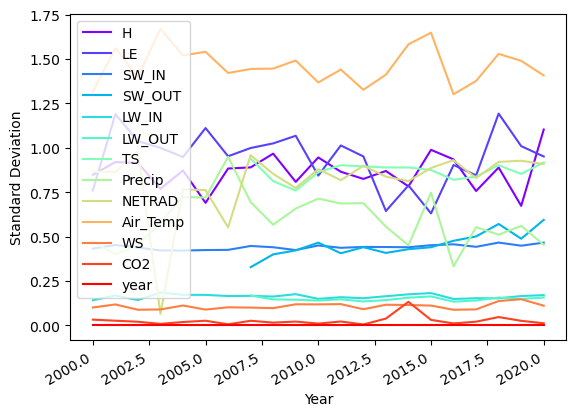

In [15]:
#%% Plot seasonality change

# Set 14 colors using numpy's linspace function
colors = plt.cm.rainbow(np.linspace(0, 1, len(df_monthly_plot.columns)))

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each variable with its corresponding color
for i, col in enumerate(df_monthly_plot.columns):
    ax.plot(df_monthly_plot.index, df_monthly_plot[col], color=colors[i], label=col)

# Set x-axis label
ax.set_xlabel('Year')

# Set y-axis label
ax.set_ylabel('Standard Deviation')

# Add legend
ax.legend()

# Optional command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate()  

# Display the plot
plt.show()



# Results:
Every variable besides CO2 showed a sense of seasonality while CO2 remained at around 380 from year to year. Where as net radion and other variables show a distinct seasonality between winter and summer months. Precipitation was very low during the winter months and high during the spring and fall (Polar Plot). CO2 remained nearly constant during all months which could be due to a buffering affect caused by the tower location (CO2 Bar Chart). The senser on the US-Ho2 tower measures the down and upflowing eddies in the atmosphere around it. From the Keeling Curve, we know that CO2 in the winter is the highest due to deciduous trees losing their leaves and not photosynthesising. However, this is not supported in my results which clearly shows no seasonal variation in the data. 

This location is located in a evergreen forest with a constant canopy below the sensor at the tower year round. The abnormally low CO2 in the winter and high in the summer months, when compared to the Keeling Curve, can be explained by this type of forest. Since there is warm temperatures, high solar radiation, and fairly high precipitation amounts during the spring and summer months, there could be a source of CO2 from the soil below the tower. This coupled with the low CO2 amounts in the atmospher would create a diffusion gradient that would be in between the high and low amounts resulting in above the normal amount of CO2 during the summer months. 

For the winter months the exact opposite would be occuring. Since this tower is in a coniferous forest and does not lose there leaves in the winter, then they can photosynthesise in the winter. This could result in the upflowing eddies containing a lower amount of CO2 and the downflowing eddies to have a higher amoount. This would result in a slightly lower CO2 reading during the winter months when compared to the Keeling Curve.



# Conclusion: 
From this code I gained experience in using methods from lectures and past labs and generate 7 plots using statistical analysis methods from lecture. My results showed seasonality fromm nearly all variables except for CO2. This could be explained by the location the US-Ho2 tower is at. Running this code for stations with varying locational attributes may provide a greater understanding of how loacation can vary seasonality. This is vital because glodal climate change is a major issue however, knowing what is causing changes to seasonality, will allow scientists to pin point what is contributing the most to climate change. If you know how a location may vary how a varible shows seasonality, then this could be used to fine tune a code that runs future scenerios. 

# References 

David Hollinger (2021), AmeriFlux BASE US-Ho2 Howland Forest (west tower), Ver. 4-5, AmeriFlux AMP, (Dataset). https://doi.org/10.17190/AMF/1246062

Monroe, R. (2023, March 16). The Keeling curve. The Keeling Curve. https://keelingcurve.ucsd.edu/ 